In [21]:
#Importing the Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [22]:
# loading the csv data to a Pandas DataFrame
logData = pd.read_csv('2021-01-01.csv',low_memory=False) #,sep="|", low_memory=True

In [23]:
logData.head()

Category     Type  Target-Cat  Target-Type  Target
0    ERROR   Notice           1            1       1
1    ERROR   Notice           1            1       1
2    ERROR   Notice           1            1       1
3     INFO  7.34 Vi           0            4       0
4     INFO  3.7 Vis           0            4       0

In [24]:
logData.shape

(475680, 5)

In [25]:
logData.describe()

Target-Cat    Target-Type         Target
count  475680.000000  475680.000000  475680.000000
mean        0.740683       1.826873       0.740344
std         0.438260       1.304259       0.438446
min         0.000000       1.000000       0.000000
25%         0.000000       1.000000       0.000000
50%         1.000000       1.000000       1.000000
75%         1.000000       4.000000       1.000000
max         1.000000       4.000000       1.000000

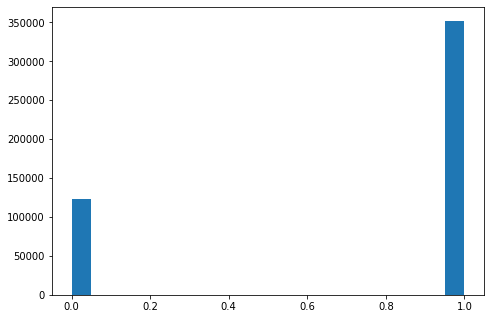

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(logData["Target"],20)
plt.show()

In [29]:
#Data Cleaning
#Splitting the Features and Target
#Splitting the Features and Target
y = logData['Target']
malData = logData.drop(['Category','Type','Target'],axis=1)

In [30]:
#Splitting the Data into Training data & Test Data
X_train, X_test, y_train, y_test = train_test_split(malData, y, test_size=0.2, stratify=Y, random_state=42)

In [32]:
X_train.shape

(380544, 2)

In [33]:
#Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
randomModel=clf.fit(X_train,y_train)

In [34]:
#RandomForestEvaluation
from sklearn.metrics import f1_score,accuracy_score,plot_confusion_matrix,auc,confusion_matrix

In [35]:
#Accuracy 
trian_pred = randomModel.predict(X_train)
accuracy_score(y_train,trian_pred)

1.0

In [36]:
#Accuracy on test data
prediction = randomModel.predict(X_test)
accuracy_score(y_test,prediction)

1.0

In [37]:
f1_score(y_test,prediction)

1.0

Confusion Matrix, without normalazation


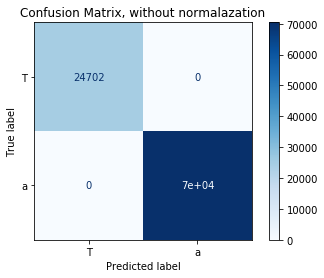

Normalized Confusion Matris


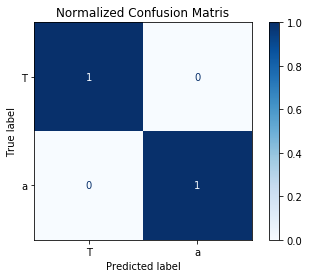

In [42]:
titles_options = [("Confusion Matrix, without normalazation",None),
                  ('Normalized Confusion Matris','true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(randomModel, X_test, y_test, 
                                 display_labels='Target',
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    #print(disp.confusion.matrix)
    
    plt.show()
    

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Dense

ImportError: cannot import name 'Dense' from 'tensorflow.keras.models' (/opt/anaconda3/lib/python3.7/site-packages/tensorflow/keras/models/__init__.py)

In [ ]:
#Define Model
model = Sequential()
model.add(Dense(16,input_dim=54,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(8,activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='rmsprop',metris=["accuracy"])

In [ ]:
#Fit Model
model.fit(X_train,y_train,epochs=5,batch_size=32)

In [ ]:
#Accuracy 
trianPred = model.predict(X_train)
trianPred = [1 if y>0.5 else 0 for y in trianPred]
accuracy_score(y_train,trianPred)

In [ ]:
#Accuracy on test data
y_prediction = model.predict(X_test)
y_prediction = [1 if y>0.5 else 0 for y in y_prediction]
accuracy_score(y_test,y_prediction)

In [ ]:
confusion_matrix(y_test,y_prediction)

In [ ]:
f1_score(y_test,y_prediction)